In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.neighbors import KNeighborsClassifier

In [2]:
zoo= pd.read_csv(r'/Users/rahulpoojith/Documents/Excelr Datasets/Machine Learning Datasets/Zoo.csv')

In [3]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
## EDA process
zoo.info()     ## start with preprocessing techniques like EDA process

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo.describe()      ## Summary stats

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
zoo.isnull().sum()        ## Thre is no missing value

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
zoo.duplicated().any()

False

In [8]:
zoo.duplicated().sum()  ## There is no duplicates value

0

In [9]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  ## Here we used label encoder for convert the ordinal column into numerical column

In [10]:
zoo1=LabelEncoder()

In [11]:
zoo1

LabelEncoder()

In [12]:
animal_name= zoo.index.get_level_values(0)
animal_name

RangeIndex(start=0, stop=101, step=1)

In [13]:
animal_name_zoo1= zoo1.fit_transform(animal_name)
animal_name_zoo1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [14]:
zoo.insert(0 ,'animal_name' , animal_name_zoo1)   # here we pass the index 0 , variable & label encoder

In [15]:
zoo.drop('animal name', axis= 1, inplace= True)  ## pass the column name drop the columns 

In [16]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<Axes: >

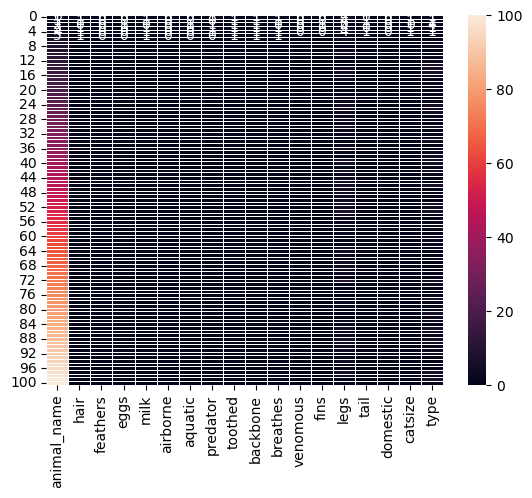

In [17]:
sns.heatmap(zoo, annot=True, linewidth=.5)

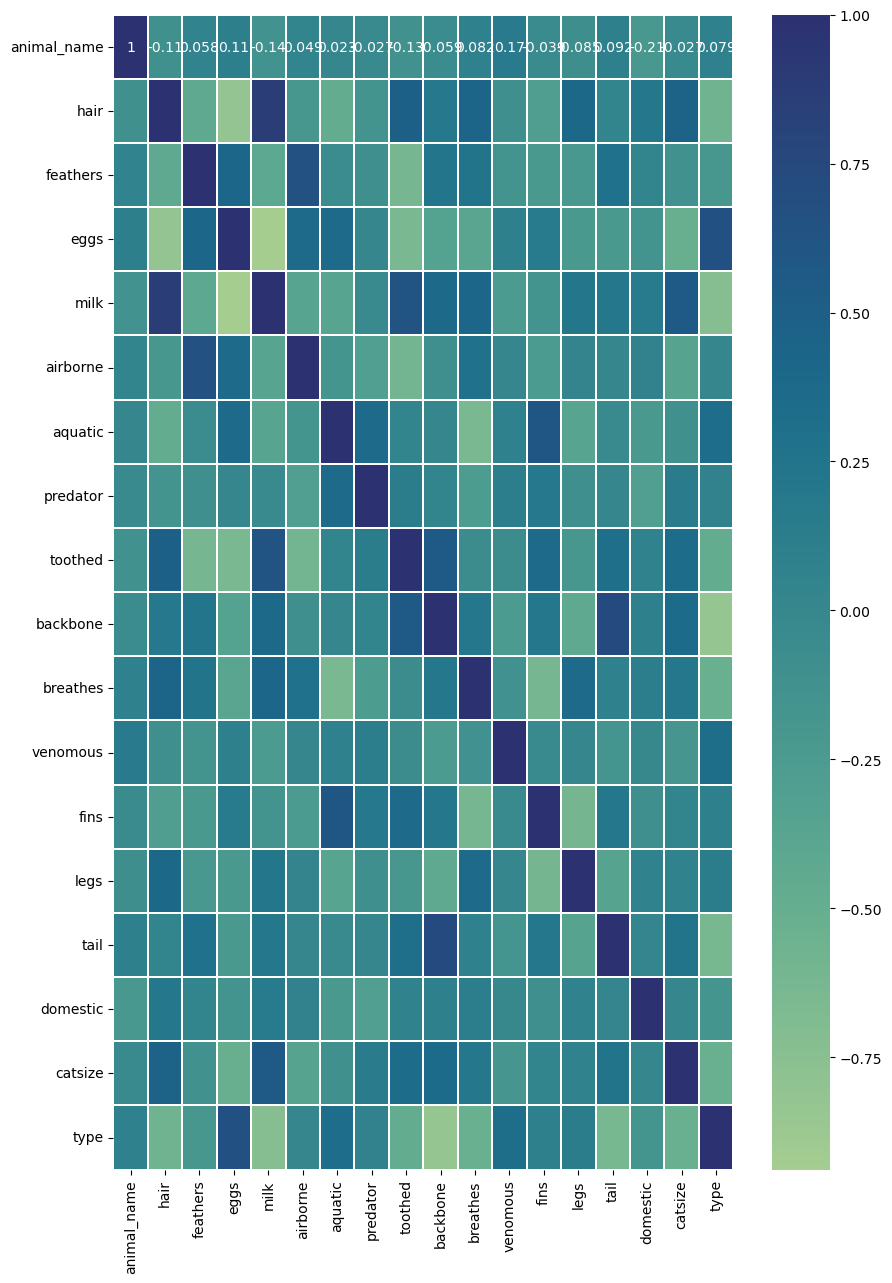

In [18]:
##### Visulizatio of corr matrix
plot.figure(figsize=(10, 15))
sns.heatmap(zoo.corr(), linewidths= 0.3, annot= True, cmap= 'crest')
plot.show()

## KNN Algorithym

it uses for diffrent problems like for regression  used KNN regression and for classifiation used kNN classifier

in KNN k is hyper parameter

k value 1 to 0 any positive number

algorithym based on minimum distance

In [19]:
x= zoo.iloc[ : , : 17 ]  ## select all rows and the first 17 columns of dataframe

In [20]:
x

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
y= zoo.iloc[ : ,17]    ## select all rows of data frame for column with index 17
y                     ## Purpose of iloc= to select rows & col from a data frame using their integer position(starting from =0)

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=100)  ##. Split the dataset into training and testing sets (80% training, 20% testing).

In [24]:
print (x_train)
print (x_test)
print (y_train)
print (y_test)

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
27           27     1         0     0     1         1        0         0   
2             2     0         0     1     0         0        1         1   
9             9     1         0     0     1         0        0         0   
16           16     0         1     1     0         1        0         1   
58           58     0         1     1     0         0        1         1   
60           60     0         0     1     0         0        1         1   
15           15     0         0     1     0         0        1         1   
99           99     0         0     1     0         0        0         0   
34           34     0         0     1     0         0        1         0   
14           14     0         0     1     0         0        1         1   
66           66     0         0     0     1         0        1         1   
53           53     0         0     1     0         0        1         1   
52          

In [25]:
# GridSearchCV (Grid Search Cross-Validation) is a machine learning technique that can be used with K-Nearest Neighbors (KNN) to find the best combination of hyperparameters for a model
from sklearn.model_selection import GridSearchCV

In [26]:
n_neighbors=np.array(range(1,30))
param_grid=dict(n_neighbors=n_neighbors)
import warnings
warnings.filterwarnings('ignore')

In [27]:
knn=KNeighborsClassifier()
grid=GridSearchCV(estimator=knn,param_grid=param_grid)

In [28]:
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.4057142857142857
{'n_neighbors': 19}


In [30]:
k_range=range(1,31)
k_scores=[]

In [32]:
from sklearn.model_selection import cross_val_score
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x_train, y_train, cv=5)
  k_scores.append(scores.mean())

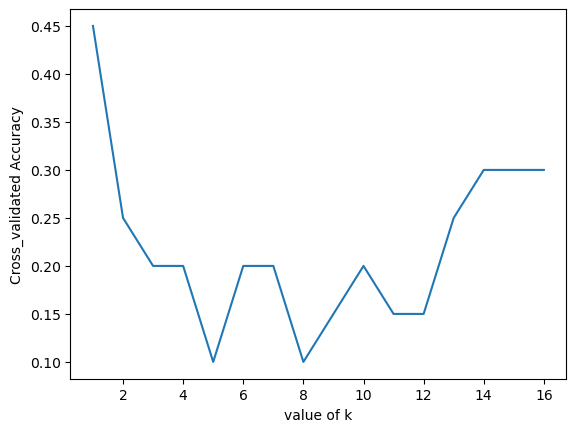

In [34]:
plot.plot(k_range,k_scores)
plot.xlabel('value of k')
plot.ylabel('Cross_validated Accuracy')
plot.show()

In [52]:
pd.Series(k_scores).sort_values(ascending=True)

4     0.10
7     0.10
8     0.15
10    0.15
11    0.15
2     0.20
3     0.20
5     0.20
6     0.20
9     0.20
1     0.25
12    0.25
13    0.30
14    0.30
15    0.30
0     0.45
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
dtype: float64

In [36]:
model=KNeighborsClassifier(n_neighbors=1)

In [37]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
ypred= model.predict(x_test)
y_pred=pd.DataFrame(ypred)
y_pred

,0
0,4
1,2
2,1
3,2
4,4
...,...
76,2
77,2
78,4
79,1


In [42]:
y_test

37    2
86    4
26    5
93    1
35    1
     ..
80    3
13    7
1     1
31    1
4     1
Name: type, Length: 81, dtype: int64

. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

Metric performance

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
confusion_matrix(y_test,y_pred)

array([[16,  6,  0,  7,  2,  1,  3],
       [ 4,  7,  0,  3,  0,  0,  2],
       [ 0,  4,  0,  1,  0,  0,  0],
       [ 0,  5,  0,  4,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0],
       [ 3,  1,  0,  1,  1,  0,  1],
       [ 2,  4,  0,  0,  0,  0,  0]], dtype=int64)

In [55]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

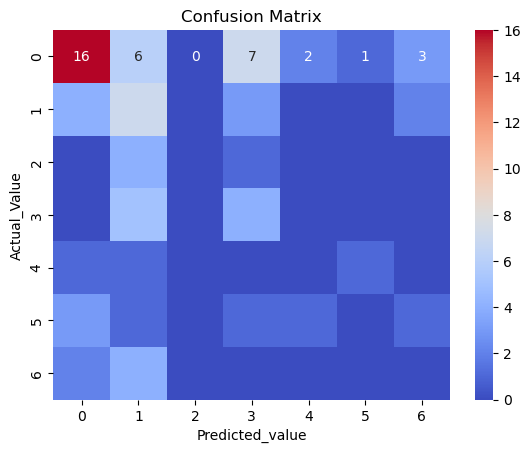

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm')
plot.xlabel('Predicted_value')
plot.ylabel('Actual_Value')
plot.title('Confusion Matrix')

In [57]:
y_test.value_counts()

type
1    35
2    16
4     9
6     7
7     6
3     5
5     3
Name: count, dtype: int64

In [58]:
classifier=print(classification_report(y_test,y_pred))   ## This show mertic performance ,Visualize the decision boundaries of the classifier.
classifier

              precision    recall  f1-score   support

           1       0.62      0.46      0.52        35
           2       0.25      0.44      0.32        16
           3       0.00      0.00      0.00         5
           4       0.25      0.44      0.32         9
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         6

    accuracy                           0.33        81
   macro avg       0.16      0.19      0.17        81
weighted avg       0.34      0.33      0.33        81



 Visualize the decision boundaries of the classifier.

Interview Questions:	
    
1. What are the key hyperparameters in KNN?

In k-Nearest Neighbors (KNN) classification and regression, there are a few key hyperparameters that you can tune to optimize performance:

1. **Number of Neighbors (`k`)**: This is the most crucial hyperparameter. It determines how many nearest neighbors are considered when making a prediction. A small value of `k` can make the model sensitive to noise in the data, while a large `k` can smooth out predictions but might make the model too generalized.

2. **Distance Metric**: This determines how the distance between data points is computed. Common distance metrics include:
   - **Euclidean Distance**: The straight-line distance between points.
   - **Manhattan Distance**: The sum of the absolute differences of the coordinates.
   - **Minkowski Distance**: A generalization of Euclidean and Manhattan distances, controlled by a parameter `p`. For `p=1`, it becomes Manhattan distance, and for `p=2`, it becomes Euclidean distance.
   - **Cosine Similarity**: Measures the cosine of the angle between two vectors, often used in text data.

3. **Weight Function**: This determines how the neighbors' votes are weighted in classification or their contributions in regression. Common options include:
   - **Uniform**: All neighbors have equal weight.
   - **Distance**: Closer neighbors have more influence than farther ones.

4. **Algorithm**: The method used to compute nearest neighbors. Options typically include:
   - **Brute Force**: A simple but potentially slow method that computes distances to all other points.
   - **K-D Tree**: A data structure that can speed up the search for nearest neighbors in low-dimensional spaces.
   - **Ball Tree**: A data structure that can be more efficient for higher-dimensional spaces.

5. **Leaf Size** (for KDTree and Ball Tree): This parameter affects the speed of the tree-building and query operations. It defines the number of points at which the tree is divided into smaller subtrees.

Tuning these hyperparameters can significantly impact the performance of your KNN model, so it's often useful to use techniques like cross-validation to find the best combination for your specific problem.







2. What distance metrics can be used in KNN?

In k-Nearest Neighbors (KNN), several distance metrics can be used to determine the similarity between data points. The choice of distance metric can significantly impact the model's performance, depending on the nature of the data. Here are some common distance metrics:

1. **Euclidean Distance**: 
   - **Formula**: \( d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \)
   - **Description**: Measures the straight-line distance between two points in Euclidean space. It's the most commonly used distance metric.

2. **Manhattan Distance**: 
   - **Formula**: \( d(x, y) = \sum_{i=1}^{n} |x_i - y_i| \)
   - **Description**: Also known as the L1 norm or city block distance, it measures the sum of the absolute differences between coordinates. It is useful for cases where the data is arranged in a grid-like fashion.

3. **Minkowski Distance**: 
   - **Formula**: \( d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p} \)
   - **Description**: A generalization of both Euclidean and Manhattan distances. By changing the parameter \( p \), you can derive different distances:
     - For \( p = 1 \), it becomes Manhattan distance.
     - For \( p = 2 \), it becomes Euclidean distance.

4. **Cosine Similarity**: 
   - **Formula**: \( \text{similarity}(x, y) = \frac{x \cdot y}{\|x\| \|y\|} \)
   - **Description**: Measures the cosine of the angle between two vectors. It is often used in text classification and information retrieval to handle high-dimensional data.

5. **Hamming Distance**: 
   - **Formula**: Number of positions at which the corresponding elements are different.
   - **Description**: Used for categorical or binary data, it counts the number of mismatches between two strings or sequences of equal length.

6. **Jaccard Distance**: 
   - **Formula**: \( d(x, y) = 1 - \frac{|X \cap Y|}{|X \cup Y|} \)
   - **Description**: Used for binary or categorical data, it measures the dissimilarity between two sets as 1 minus the Jaccard similarity coefficient.

7. **Mahalanobis Distance**: 
   - **Formula**: \( d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)} \)
   - **Description**: Takes into account the correlations between variables. It’s useful for identifying outliers and working with multivariate normal distributions.

Selecting the appropriate distance metric depends on the specific characteristics of your data and the problem you are trying to solve. For instance, Euclidean distance is often used for continuous numerical data, while Cosine similarity is popular in text analysis.
